# Week 11: Tensors

In [1]:
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/data_utils.py
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/image_utils.py

In [2]:
import PIL.Image as PImage

from torch import Tensor

from image_utils import get_pixels, make_image

## Tensors

We'll be using the [PyTorch](https://pytorch.org/) library for working with Neural Networks.

Before we start building, training, tuning models, we have to learn a little bit about [Tensors](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html)!

<img src="./imgs/tensors.jpg" width="600px"/>

Tensor is a fancy word for multi-dimensional list. They are very much like lists, where they keep a sequence of number values, or a sequence of other tensors. They are a little bit more picky than lists because they require all members to be of the same _type_ (all integers, or all floats, etc), and they don't like having inner lists of different lengths.

PyTorch tensors are optimized for doing neural network operations, and so they come with a few extra capabilities beyond `sum()`, `sort()`, `mean()`, etc.

Let's start by importing them, and taking a look at how to work with multi-dimensional tensors:

### Loading and Shaping

Let's open up an image and load its pixels into a tensor.

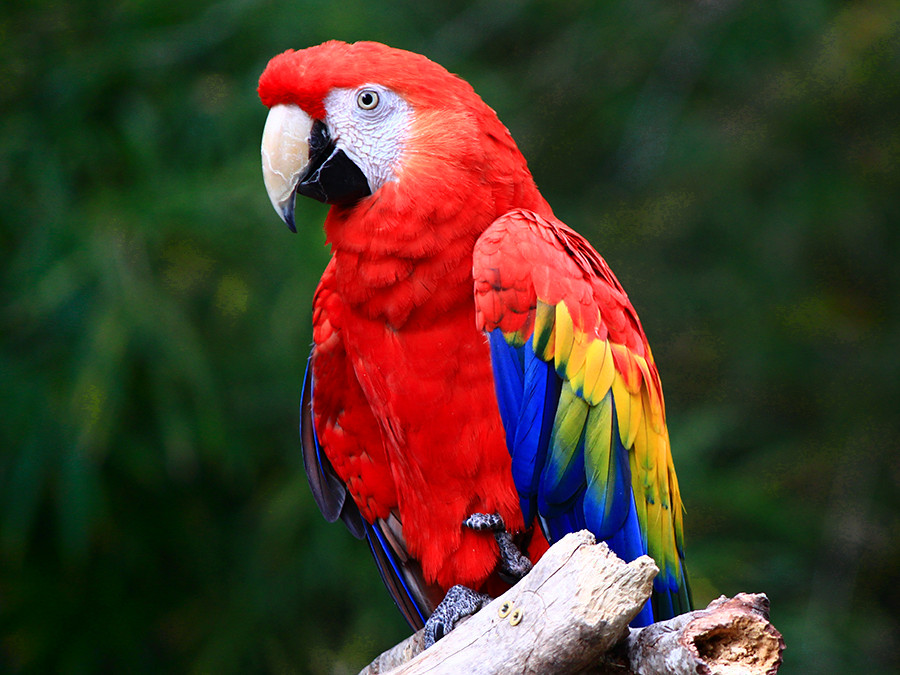

[(12, 37, 8), (11, 38, 7), (9, 39, 5), (8, 40, 3), (8, 38, 2)]


In [3]:
mimg = PImage.open("./data/image/arara.jpg")

display(mimg)
print(get_pixels(mimg)[:5])

To make a tensor out of this, we just have to pass the list of pixels to the `Tensor()` constructor.

We can check it's size with the `shape` member variable, and use slicing and indexing like we've always used with lists:

In [4]:
mimg_t = Tensor(get_pixels(mimg))

print("tensor shape")
display(mimg_t.shape)

print("first 5 pixels")
display(mimg_t[:5])

print("6th pixel")
display(mimg_t[5])

print("6th pixel, first channel")
display(mimg_t[5][0])

tensor shape


torch.Size([607500, 3])

first 5 pixels


tensor([[12., 37.,  8.],
        [11., 38.,  7.],
        [ 9., 39.,  5.],
        [ 8., 40.,  3.],
        [ 8., 38.,  2.]])

6th pixel


tensor([11., 37.,  2.])

6th pixel, first channel


tensor(11.)

### Reshape

The shape of this tensor is $607\text{,}500 \times 3$, meaning that we have $607\text{,}500$ pixels and each pixel has $3$ color values.

Let's reshape the tensor so it's more representative of our image's dimensions. We want to have a tensor of shape $h \times w \times 3$, where $h$ and $w$ are the images `height` and `width` dimensions.

The `reshape()` function does just this, we just have to pass the parameters in the right order.

In [7]:
mimg_t = Tensor(get_pixels(mimg)).reshape(mimg.size[1], mimg.size[0], 3)

print("tensor shape")
display(mimg_t.shape)

print("shape of sub-tensor with first 5 rows")
display(mimg_t[:5].shape)

print("first 5 rows")
display(mimg_t[:5])

print("first row, 6th column")
display(mimg_t[0][5])

tensor shape


torch.Size([675, 900, 3])

shape of sub-tensor with first 5 rows


torch.Size([5, 900, 3])

first 5 rows


tensor([[[12., 37.,  8.],
         [11., 38.,  7.],
         [ 9., 39.,  5.],
         ...,
         [50., 65., 22.],
         [50., 67., 23.],
         [48., 70., 24.]],

        [[16., 34., 10.],
         [15., 35., 10.],
         [12., 37.,  8.],
         ...,
         [54., 70., 25.],
         [53., 71., 23.],
         [53., 73., 24.]],

        [[20., 33., 15.],
         [17., 35., 13.],
         [13., 35., 12.],
         ...,
         [57., 71., 20.],
         [55., 72., 20.],
         [54., 72., 20.]],

        [[18., 36., 14.],
         [17., 36., 14.],
         [13., 37., 13.],
         ...,
         [57., 71., 18.],
         [57., 71., 18.],
         [55., 72., 17.]],

        [[11., 40., 10.],
         [10., 39.,  9.],
         [10., 39.,  9.],
         ...,
         [59., 74., 19.],
         [59., 74., 19.],
         [57., 74., 19.]]])

first row, 6th column


tensor([11., 37.,  2.])

Now `mimg_t[:5]` doesn't refer to first $5$ pixels anymore, but to the first $5$ rows of our image.

To get the first $5$ pixels we can use `mimg_t[0][:5]` or `mimg_t[0, :5]`.

New syntax! : We can use multiple numbers inside the square brackets, separated with a comma.

In [6]:
print("first row, first 5 columns")
mimg_t[0][:5], mimg_t[0, :5]

first row, first 5 columns


(tensor([[12., 37.,  8.],
         [11., 38.,  7.],
         [ 9., 39.,  5.],
         [ 8., 40.,  3.],
         [ 8., 38.,  2.]]),
 tensor([[12., 37.,  8.],
         [11., 38.,  7.],
         [ 9., 39.,  5.],
         [ 8., 40.,  3.],
         [ 8., 38.,  2.]]))

### Slicing

This is where it starts to get fun.

Since we now have our image in a $3D$ tensor, we can use slice in multiple directions, and at the same time.

<img src="./imgs/slicing_00.jpg" width=800px />

#### Getting

For example, if we want to crop a part of the image, we can just get slices in the first two dimensions, like this:

`mimg_t[y0:y1, x0:x1]`

where `x0` and `y0` are the horizontal and vertical location of the top-left pixel of the region we want, and `x1` and `y1` are the bottom-right coordinates of the last pixel we want.

So, to grab a $256$ X $256$ section of an image, starting at $(x,y) = (240, 30)$ we can do:

`mimg_crop = mimg_t[30:30+256, 240:240+256]`

In [8]:
x0,y0 = 240, 30

mimg_crop_t = mimg_t[y0:y0+256, x0:x0+256]

mimg_crop_t.shape, mimg_crop_t[0, :5]

(torch.Size([256, 256, 3]),
 tensor([[17., 49., 25.],
         [19., 53., 26.],
         [20., 55., 25.],
         [18., 55., 22.],
         [18., 55., 21.]]))

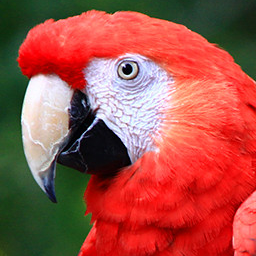

[(17, 49, 25), (19, 53, 26), (20, 55, 25), (18, 55, 22), (18, 55, 21)]

In [9]:
mimg_crop = make_image(mimg_crop_t)
display(mimg_crop)
get_pixels(mimg_crop)[:5]

#### Setting and Broadcasting

Slicing also works when assigning values to regions of our tensor/image.

Even if the values we're assigning don't perfectly match the region we want to assign them to, the tensor will try to _broadcast_ the value into the right places with the right shape.

For example, we can assign a single pixel value to an entire region with:

`mimg_t[y0:y1, x0:x1] = Tensor([220, 20, 120])`

and it knows to set every pixel in that region the same color.

Or, we can even do this, if we want to set a color in grayscale:

`mimg_t[y0:y1, x0:x1] = 220`

it will create a `Tensor([220, 220, 220])` to fill the pixel region specified.

The tensor will convert/broadcast the value into the right shape to fit the region we are slicing.

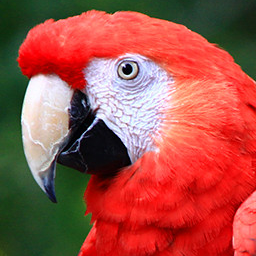

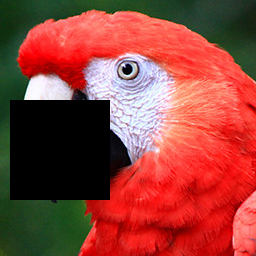

In [10]:
# copy the tensor for editing
mimg_blank_t = mimg_crop_t.clone()
display(make_image(mimg_blank_t))

mimg_blank_t[100:200, 10:110] = 0
display(make_image(mimg_blank_t))

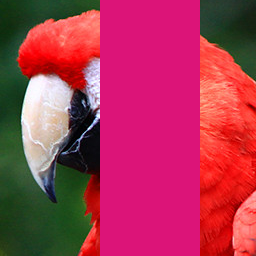

In [11]:
mimg_blank_rows_t = mimg_crop_t.clone()

# TODO: try to assign colors to entire rows/column
mimg_blank_rows_t[:, 100:200] = Tensor([220,20,120])

display(make_image(mimg_blank_rows_t))

This multi-dimensional slicing also means that we can separate the color channels of our images using a single line of code, and no looping!

For looking at the `R` channel, just set `G` and `B` to `0`.

```python
mimg_crop_r_t[:, :, 1:3] = 0
```

The `:` in `[:, :, 1:3]` means grab every row and every column. Then `1:3` specifies the second and third channel of each pixel.

In [12]:
mimg_crop_r_t = mimg_crop_t.clone()
mimg_crop_r_t[:, :, 1:3] = 0

# look at first 5 pixels
mimg_crop_r_t[0, :5]

tensor([[17.,  0.,  0.],
        [19.,  0.,  0.],
        [20.,  0.,  0.],
        [18.,  0.,  0.],
        [18.,  0.,  0.]])

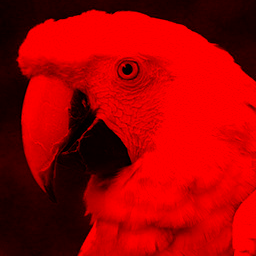

In [13]:
display(make_image(mimg_crop_r_t))

In [14]:
mimg_crop_g_t = mimg_crop_t.clone()
# TODO: get separate green channel image
mimg_crop_g_t[:, :, 0] = 0
mimg_crop_g_t[:, :, 2] = 0

mimg_crop_b_t = mimg_crop_t.clone()
# TODO: get separate blue channel image
mimg_crop_b_t[:, :, :2] = 0

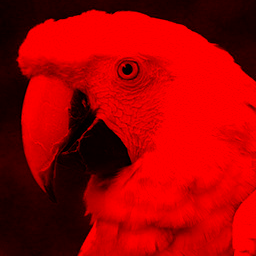

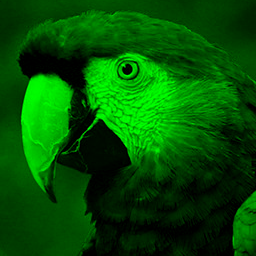

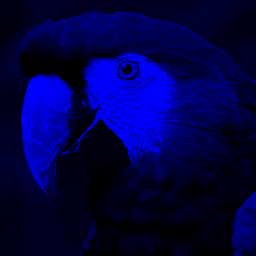

In [15]:
display(make_image(mimg_crop_r_t))
display(make_image(mimg_crop_g_t))
display(make_image(mimg_crop_b_t))

#### Slicing in Multiple Dimensions

We can combine slicing regions and slicing specific color channels to create effects with little code.

This creates an image by combining shifted versions of the separate `R`, `G` and `B` channel images from above:

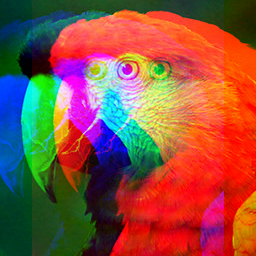

In [16]:
# create an image the same shape as the original image, but with all 0s
mimg_crop_rgb_t = mimg_crop_t.clone()
mimg_crop_rgb_t[:] = 0

mimg_crop_rgb_t[:, 32:, 0] += mimg_crop_t[:, :-32, 0]
mimg_crop_rgb_t[:, :, 1] += mimg_crop_t[:, :, 1]
mimg_crop_rgb_t[:, :-32, 2] += mimg_crop_t[:, 32:, 2]

display(make_image(mimg_crop_rgb_t))

Code like this is not very professional-looking or understandable, but can be fun to write.

Don't worry if this effect isn't completely obvious at first, but try to break down each of the lines and each of the slicing expressions into simpler terms. Like:
- `mimg_crop_rgb_t[:] = 0`: sets all pixels to black, creating a black image with same dimensions as the original
- `mimg_crop_rgb_t[:, 32:, 0]`: from black image, selects all rows, all columns except first $32$, and red channel
- `mimg_crop_t[:, :-32, 0]`: from original image, all rows, all columns except last $32$, and red channel

... etc....

#### Changing Shape

We can also get the individual pixel values for each channel using slicing.

This gets all of the red values of all pixels as a two-dimensional tensor of shape $h$ X $w$:

`mimg_crop_t[:,:,0]`

After this operation, each pixel will only have $1$ channel, so when we display these images they will be grayscale representations of each channel.

torch.Size([256, 256])


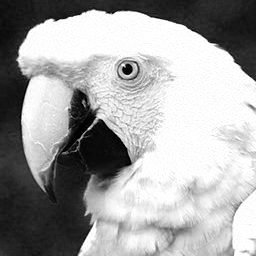

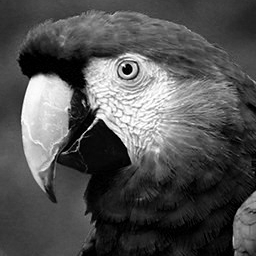

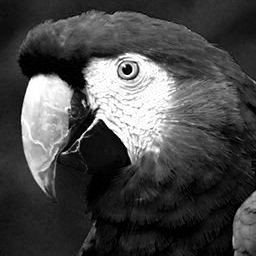

In [17]:
print(mimg_crop_t[:,:,0].shape)

display(make_image(mimg_crop_t[:,:,0]))
display(make_image(mimg_crop_t[:,:,1]))
display(make_image(mimg_crop_t[:,:,2]))

### Operations along specific dimensions

Just like `DataFrames`, `Tensor` objects also have a bunch of built-in functions for performing common operations on their content.

Functions like, `sum()`, `mean()`, `max()`, `std()`, should be familiar:

In [18]:
my_t = Tensor([[1, 2], [2, 4], [-2, -1]])

display(my_t)
print("sum:\t", my_t.sum(),
      "\nmean:\t", my_t.mean(),
      "\nmax:\t", my_t.max(),
      "\nstd:\t", my_t.std())

tensor([[ 1.,  2.],
        [ 2.,  4.],
        [-2., -1.]])

sum:	 tensor(6.) 
mean:	 tensor(1.) 
max:	 tensor(4.) 
std:	 tensor(2.1909)


With `DataFrames` a lot of these functions would happen along columns, so we would get the `mean`, `max`, `sum` of each of the features in the dataset.

By default our `Tensor` performs these operations on all of its data and returns one value.

We can change this behavior by providing an extra argument to the functions, specifying the dimension along which we want to perform the operation. It helps to think of this parameter as the dimension we want to "_reduce_", or remove.

So, for example, `sum(0)` gets rid of the rows, by summing down the `Tensor` columns, while `mean(1)`, gets rid of the columns, by computing the average value of the `Tensor` rows.

In [19]:
display(my_t)

print("sum rows:\t", my_t.sum(0),
      "\nmean columns:\t", my_t.mean(1))

tensor([[ 1.,  2.],
        [ 2.,  4.],
        [-2., -1.]])

sum rows:	 tensor([1., 5.]) 
mean columns:	 tensor([ 1.5000,  3.0000, -1.5000])


What this means is that we can convert our image to grayscale in one line of code by reducing the $3^{rd}$ dimension, which holds the color values for each pixel.

In [ ]:
print("original shape:", mimg_crop_t.shape)
mimg_crop_gs_t = mimg_crop_t.mean(2)

print("reduced shape:", mimg_crop_gs_t.shape)

display(make_image(mimg_crop_gs_t))

### Reduce or Not Reduce

Sometimes we might need the result of an operation along an axis without getting rid of the dimension.

For example, we might want to convert our image to grayscale, but still keep it a 3-channel image.

In these situations we can set `keepdim=True` in the operation and broadcast the result to a tensor of the original shape.

original shape: torch.Size([256, 256, 3])
reduced shape: torch.Size([256, 256, 3])


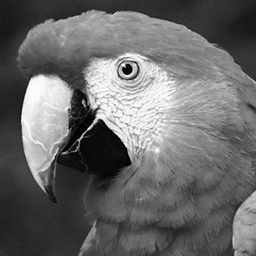

In [20]:
print("original shape:", mimg_crop_t.shape)

mimg_crop_gs3_t = mimg_crop_t.clone()
mimg_crop_gs3_t[:] = mimg_crop_t.mean(2, keepdim=True)

print("reduced shape:", mimg_crop_gs3_t.shape)

display(make_image(mimg_crop_gs3_t))

### Filtering with Boolean Indexes

We can also select certain elements, regions, or dimensions of our tensors using boolean tensors.

Instead of passing numeric indexes, or slices, to our tensor's square brackets, we can select elements by passing a tensor of similar shape, but whose contents are `True`/`False` values.

This works for setting and getting elements.

The easiest way to create these boolean selector tensors is usually by manipulating the original tensor.

The following line of code creates a two-dimensional tensor whose element are the difference between the `R` and `G` channels of our image:

`(mimg_crop_t[:,:,0] - mimg_crop_t[:,:,1])`

It's first two dimensions are just like the original `mimg_crop_t`'s shape, but the last dimension holds a single value, and not a pixel value list.

In [21]:
mimg_rg_diff_t = mimg_crop_t[:,:,0] - mimg_crop_t[:,:,1]

print(mimg_rg_diff_t)
print(mimg_rg_diff_t.shape)

tensor([[-32., -34., -35.,  ..., -14., -18., -20.],
        [-25., -28., -33.,  ..., -13., -18., -20.],
        [-37., -37., -40.,  ..., -16., -17., -20.],
        ...,
        [-24., -24., -23.,  ..., 159., 138., 113.],
        [-24., -24., -23.,  ..., 126., 114., 102.],
        [-21., -23., -23.,  ...,  81.,  84.,  99.]])
torch.Size([256, 256])


This line creates a boolean tensor, whose values specify whether the `R` channel value is larger than the `G` channel value by more than $80$, for every pixel in the image:

`((mimg_crop_t[:,:,0] - mimg_crop_t[:,:,1]) > 80)`

It holds boolean values.

In [22]:
mimg_rg_diff_thold_t = (mimg_crop_t[:,:,0] - mimg_crop_t[:,:,1]) > 80

print(mimg_rg_diff_thold_t)
print(mimg_rg_diff_thold_t.shape)

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ...,  True,  True,  True],
        [False, False, False,  ...,  True,  True,  True],
        [False, False, False,  ...,  True,  True,  True]])
torch.Size([256, 256])


We could now use this indexing `Tensor` to select only those pixels from the original image and multiply them by the one-dimensional tensor `[4, 1, 1]` to exaggerate their `R` channel values by a factor of $4$, while keeping `G` and `B` intact:

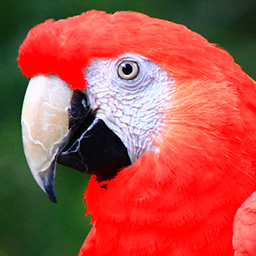

In [23]:
mimg_red_bool_t = mimg_crop_t.clone()

rgtg_idx = ((mimg_crop_t[:,:,0] - mimg_crop_t[:,:,1]) > 80)
mimg_red_bool_t[rgtg_idx] *= Tensor([4, 1, 1])

display(make_image(mimg_red_bool_t))

#### More Filtering

Before running the cells... try to work out what the following indexing, selecting, slicing, assignments do.

We're going to be writing, but also reading, lots of code with some pretty intense, non-professional looking, `Tensor` operations.

In [24]:
# TODO: what does this do?
#       gets pixel indexes where red value is greater than green value by 80
rgtg_idx = (mimg_crop_t[:,:,0] - mimg_crop_t[:,:,1]) > 80

# TODO: what about this?
#       gets pixel indexes where red value is greater than blue value by 80
rgtb_idx = (mimg_crop_t[:,:,0] - mimg_crop_t[:,:,2]) > 80

# TODO: and these ?
#       gets pixel indexes where red value is greater than green and blue values by 80
#       gets indexes of the mostly-red pixels
r_idx = rgtg_idx & rgtb_idx

# TODO: ?
#       gets indexes of the pixels that are not mostly-red
nr_idx = ~r_idx

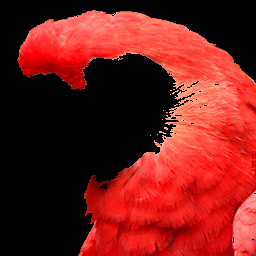

In [25]:
mimg_idx_bool_t = mimg_crop_t.clone()

# TODO: result is ... ?
#       sets non-red pixels to black
mimg_idx_bool_t[nr_idx] = 0

display(make_image(mimg_idx_bool_t))

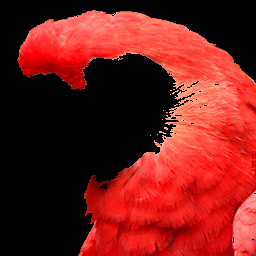

In [26]:
# TODO: what do these 2 lines do?
#       clones and image and sets all pixels to black
#       basically creates an all-black image of the same dimensions as mimg_crop_t
mimg_blank_t = mimg_crop_t.clone()
mimg_blank_t[:] = 0


# TODO: how is this cell different from the 2 previous ones?
#       this cell adds back the red-pixels onto the all-black image
#       where previously we turned non-red pixels black
#       same result, but different process
mimg_blank_t[r_idx] = mimg_crop_t[r_idx]

display(make_image(mimg_blank_t))

And these?

In [27]:
# TODO: what is the effect of the extra parameter in mean()?
#       keeps the dimension that should've been reduced
#       this helps with broadcasting
mimg_crop_gs_t = mimg_crop_t.mean(2, keepdim=True)

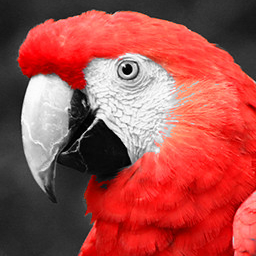

In [28]:
mimg_gs_bool_t = mimg_crop_t.clone()

# TODO: what does this do?
#       sets the non-red pixels to their grayscale value
mimg_gs_bool_t[nr_idx] = mimg_crop_gs_t[nr_idx]

display(make_image(mimg_gs_bool_t))